In [17]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [18]:
IMAGE_SIZE = [224, 224]

In [19]:
train_path = '/content/drive/MyDrive/Cotton disease/Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Cotton disease/Cotton Disease/test'

In [20]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
for layer in vgg16.layers:
  layer.trainable=False

In [36]:
folders = glob('/content/drive/MyDrive/Cotton disease/Cotton Disease/train/*')

In [37]:
len(folders)

60

In [23]:
x = Flatten()(vgg16.output)

In [47]:
prediction = Dense(4, activation='softmax')(x)

In [48]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [49]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [50]:
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton disease/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [54]:
testing_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton disease/Cotton Disease/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [55]:
r = model.fit_generator( training_set,
                         validation_data=testing_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(testing_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 460s 8s/step - loss: 1.1210 - accuracy: 0.6128 - val_loss: 0.2759 - val_accuracy: 0.9151
Epoch 2/20
61/61 [==============================] - 38s 617ms/step - loss: 0.2518 - accuracy: 0.9104 - val_loss: 0.2073 - val_accuracy: 0.8962
Epoch 3/20
61/61 [==============================] - 37s 612ms/step - loss: 0.1621 - accuracy: 0.9458 - val_loss: 0.1434 - val_accuracy: 0.9528
Epoch 4/20
61/61 [==============================] - 37s 607ms/step - loss: 0.1335 - accuracy: 0.9564 - val_loss: 0.2315 - val_accuracy: 0.8962
Epoch 5/20
61/61 [==============================] - 37s 601ms/step - loss: 0.1755 - accuracy: 0.9292 - val_loss: 0.2045 - val_accuracy: 0.9245
Epoch 6/20
61/61 [==============================] - 37s 600ms/step - loss: 0.1137 - accuracy: 0.9609 - val_loss: 0.2067 - val_accuracy: 0.9245
Epoch 7/20
61/61 [==============================] - 37s 599ms/step - loss: 0.1001 - accuracy: 0.9641 - val_loss: 0.1302 - val_accuracy: 0.9623
E

In [56]:
import matplotlib.pyplot as plt

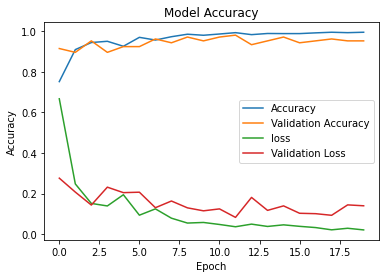

In [57]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [58]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

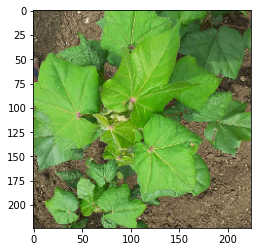

In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Cotton disease/Cotton Disease/test/diseased cotton plant/dd (21)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [61]:
preds


array([[6.8336414e-07, 9.9989653e-01, 8.8125535e-06, 9.3948329e-05]],
      dtype=float32)

In [62]:
preds = np.argmax(preds, axis=1)

In [63]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
